## My model

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [196]:
model1 = Sequential([
    Flatten(input_shape=(784,)),
    Dense(320, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

In [197]:
optimizer = tf.keras.optimizers.Adam()
model1.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = 'sgd',
                metrics = 'acc')

In [185]:
df_train = pd.read_csv('./mnist_data/train.csv')
df_test = pd.read_csv('./mnist_data/test.csv')

In [186]:
df = df_train
# Has the label column
print('shape : ', df.shape)

# Drops it
X = df.drop('label', axis = 1)
# Label of the 42k images
y = df['label']

shape :  (42000, 785)


In [192]:
X /= 255.0

In [187]:
X.loc[0].shape

(784,)

In [199]:
model1.fit(X, y, epochs=30)


Epoch 1/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1754 - acc: 0.9501
Epoch 2/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1573 - acc: 0.9560
Epoch 3/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1431 - acc: 0.9597
Epoch 4/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1303 - acc: 0.9637
Epoch 5/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1191 - acc: 0.9668
Epoch 6/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1096 - acc: 0.9699
Epoch 7/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.1013 - acc: 0.9721
Epoch 8/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0936 - acc: 0.9738
Epoch 9/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0874 - acc: 0.9762
Epoch 10/30
1313/1313 [==============================] - 2s 1ms/step - loss: 0.0811 - acc: 0.9780
Epoch 11/30
1313/1313 [======

In [200]:
ypreds = model1.predict(df_test)

In [201]:
ypreds

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

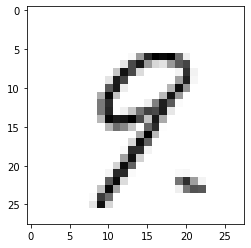

In [203]:
first = df_test.loc[2].values
first = first.reshape(28,28)
plt.imshow(first, cmap='binary')


### Model Save

In [206]:
path = './model1_mnist/'
tf.saved_model.save(model1, path)

INFO:tensorflow:Assets written to: ./model1_mnist/assets


### Model Conversion

In [208]:
converter = tf.lite.TFLiteConverter.from_saved_model(path)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS  # enable TensorFlow ops.
]
tflite_model = converter.convert()

interpreter = tf.lite.Interpreter(model_content=tflite_model)
signatures = interpreter.get_signature_list()
print(signatures)

{'serving_default': {'inputs': ['flatten_8_input'], 'outputs': ['dense_37']}}


Use the lite model

In [209]:
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

Test with the same image as tested with the model network

In [247]:
input_shape = input_details[0]['shape']
print(input_shape)

# Is set to 0 until set
print(interpreter.get_tensor(output_details[0]['index']))

test_img = df_test.loc[2].values # is a 9 
input_data = np.array(test_img, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data.reshape(1,784))

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)


[  1 784]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:

signatures = interpreter.get_signature_list()
print('signatures', signatures)

In [ ]:
input_data.reshape(28,28)
plt.imshow(first, cmap='binary')

In [244]:
print(input_details)
np.shape(input_data)

[{'name': 'serving_default_flatten_8_input:0', 'index': 0, 'shape': array([  1, 784], dtype=int32), 'shape_signature': array([ -1, 784], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


(784,)